In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn import preprocessing
from scipy import stats

import statsmodels.api as sm

import duckdb
import warnings 
warnings.filterwarnings('ignore')

In [69]:
diabetes_df = pd.read_csv("diabetes_1.csv")

In [70]:
diabetes_df['State'].unique()
state_to_region = {'Northeast': ['New York', 'Massachusetts', 'Pennsylvania', 'Maryland'],
                  'South': ['Florida', 'Texas', 'Tennessee', 'Kentucky', 'North Carolina', 'Virginia', 'Alabama', 'Louisiana', 'Georgia', 'Mississippi', 'Missouri'],
                  'Midwest': ['Illinois', 'Ohio', 'Michigan', 'Wisconsin'], 'West': ['Colorado', 'Washington', 'California', 'Nevada', 'Arizona']}
diabetes_df['Region'] = pd.Series()


In [71]:
for i in range(len(diabetes_df['State'])):
    if diabetes_df['State'][i] in state_to_region['Northeast']:
        diabetes_df['Region'][i] = 'Northeast'
    elif diabetes_df['State'][i] in state_to_region['South']:
        diabetes_df['Region'][i] = 'South'
    elif diabetes_df['State'][i] in state_to_region['Midwest']:
        diabetes_df['Region'][i] = 'Midwest'
    elif diabetes_df['State'][i] in state_to_region['West']:
        diabetes_df['Region'][i] = 'West' 
    else:
        diabetes_df['Region'][i] = 'Unknown'
        
        
     
         
        
        
        

In [72]:
diabetes_df[diabetes_df['State'] == 'Unknown']


,ID,Year,Age,Race,Sex,State,Zip_Code,MSA,Enrollment_Type_Categorized,Enrollment_Months,...,sitagliptin_and_metformin_hydrochloride,Avg_ADI,Max_ADI,Min_ADI,SVI1,SVI3,SVI4,SVI,MDI,Region
12403,502017,2017,45,Hispanic,Male,Unknown,48911,Unknown,20,12.0,...,0,75.333333,96.0,38.0,0.281248,0.281334,0.508021,0.375466,NaN,Unknown
12404,502019,2019,47,Hispanic,Male,Unknown,48911,Unknown,20,12.0,...,0,75.333333,96.0,38.0,0.281248,0.281334,0.508021,0.375466,NaN,Unknown
12405,502020,2020,48,Hispanic,Male,Unknown,48911,Unknown,20,12.0,...,0,75.333333,96.0,38.0,0.281248,0.281334,0.508021,0.375466,NaN,Unknown
12406,2552017,2017,76,White,Female,Unknown,48506,Unknown,10,12.0,...,0,82.812500,100.0,63.0,-14.360588,-14.498202,-14.442701,-14.387013,NaN,Unknown
12407,2552019,2019,78,White,Female,Unknown,48506,Unknown,10,12.0,...,0,82.812500,100.0,63.0,-14.360588,-14.498202,-14.442701,-14.387013,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20283,58722017,2017,64,Asian,Female,Unknown,48911,Unknown,20,12.0,...,0,75.333333,96.0,38.0,0.281248,0.281334,0.508021,0.375466,NaN,Unknown
20284,80202019,2019,68,White,Female,Unknown,48504,Unknown,10,12.0,...,0,88.000000,100.0,70.0,-14.360588,-14.498202,-14.442701,-14.387013,NaN,Unknown
20285,93402018,2018,74,White,Male,Unknown,49705,Unknown,10,12.0,...,0,61.200000,85.0,49.0,0.520989,0.158867,0.426078,0.414422,NaN,Unknown
20338,29902017,2017,71,White,Female,Unknown,48917,Unknown,10,12.0,...,0,61.482759,100.0,26.0,-35.236656,-23.311688,-94.646452,-94.703669,NaN,Unknown


In [73]:
region_dummies = pd.get_dummies(diabetes_df['Region'], dtype = int)
race_dummies = pd.get_dummies(diabetes_df['Race'], dtype = int)


In [74]:
gender_dict = {'Male': 0, 'Female': 1}
diabetes_df['Sex'] = diabetes_df['Sex'].map(gender_dict)


In [75]:
diabetes_df['Sex']
print(race_dummies.head())

   Asian  Black  Hispanic  North American Native  Other Race  UnKnown  White
0      0      0         0                      0           0        0      1
1      0      1         0                      0           0        0      0
2      0      0         0                      0           0        0      1
3      0      1         0                      0           0        0      0
4      0      1         0                      0           0        0      0


In [76]:
er = diabetes_df['#_ER'] + diabetes_df['#_ER_Admissions']
er
diabetes_df['ER_Admissions'] = er
diabetes_df.head()

,ID,Year,Age,Race,Sex,State,Zip_Code,MSA,Enrollment_Type_Categorized,Enrollment_Months,...,Avg_ADI,Max_ADI,Min_ADI,SVI1,SVI3,SVI4,SVI,MDI,Region,ER_Admissions
0,68802021,2021,68,White,0,Michigan,48176,11460,10,12.0,...,30.157895,67.0,8.0,-27.707059,-18.227551,-27.590337,-27.727856,14.16,Midwest,0
1,3422021,2021,60,Black,0,Michigan,49224,12980,20,12.0,...,80.200000,100.0,52.0,-21.266317,0.272289,-21.271530,-21.282509,15.39,Midwest,0
2,7892020,2020,46,White,0,Michigan,49016,12980,20,12.0,...,82.545455,97.0,63.0,0.529493,0.376685,0.616187,0.555240,15.39,Midwest,0
3,42792020,2020,84,Black,1,Michigan,49224,12980,10,12.0,...,80.200000,100.0,52.0,-21.266317,0.272289,-21.271530,-21.282509,14.16,Midwest,0
4,42792018,2018,82,Black,1,Michigan,49224,12980,10,12.0,...,80.200000,100.0,52.0,-21.266317,0.272289,-21.271530,-21.282509,14.16,Midwest,0


In [77]:
diabetes_with_dummies = pd.concat([diabetes_df, race_dummies, region_dummies], axis = 1)
diabetes_with_dummies

,ID,Year,Age,Race,Sex,State,Zip_Code,MSA,Enrollment_Type_Categorized,Enrollment_Months,...,Hispanic,North American Native,Other Race,UnKnown,White,Midwest,Northeast,South,Unknown,West
0,68802021,2021,68,White,0,Michigan,48176,11460,10,12.0,...,0,0,0,0,1,1,0,0,0,0
1,3422021,2021,60,Black,0,Michigan,49224,12980,20,12.0,...,0,0,0,0,0,1,0,0,0,0
2,7892020,2020,46,White,0,Michigan,49016,12980,20,12.0,...,0,0,0,0,1,1,0,0,0,0
3,42792020,2020,84,Black,1,Michigan,49224,12980,10,12.0,...,0,0,0,0,0,1,0,0,0,0
4,42792018,2018,82,Black,1,Michigan,49224,12980,10,12.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20406,13712019,2019,57,White,0,Michigan,48035,19820,20,12.0,...,0,0,0,0,1,1,0,0,0,0
20407,64542020,2020,77,Black,1,Michigan,48439,22420,10,12.0,...,0,0,0,0,0,1,0,0,0,0
20408,20942017,2017,70,White,0,Michigan,48708,13020,10,12.0,...,0,0,0,0,1,1,0,0,0,0
20409,54602021,2021,70,White,1,Michigan,48838,99022,10,12.0,...,0,0,0,0,1,1,0,0,0,0


In [78]:
# diabetes_with_dummies.columns

In [79]:
diabetes_with_dummies= diabetes_with_dummies.rename(columns = {'UnKnown':'Unknown_race', 'Other Race' : 'Other_race', 
                                                              'North American Native': 'North_American_Native', 'Unknown': 
                                                              'Unknown_region'})
print(diabetes_with_dummies)

             ID  Year  Age   Race  Sex     State Zip_Code    MSA  \
0      68802021  2021   68  White    0  Michigan    48176  11460   
1       3422021  2021   60  Black    0  Michigan    49224  12980   
2       7892020  2020   46  White    0  Michigan    49016  12980   
3      42792020  2020   84  Black    1  Michigan    49224  12980   
4      42792018  2018   82  Black    1  Michigan    49224  12980   
...         ...   ...  ...    ...  ...       ...      ...    ...   
20406  13712019  2019   57  White    0  Michigan    48035  19820   
20407  64542020  2020   77  Black    1  Michigan    48439  22420   
20408  20942017  2017   70  White    0  Michigan    48708  13020   
20409  54602021  2021   70  White    1  Michigan    48838  99022   
20410  77822019  2019   47  White    1  Michigan    48340  19820   

       Enrollment_Type_Categorized  Enrollment_Months  ...  Hispanic  \
0                               10               12.0  ...         0   
1                               20     

In [80]:
diabetes_with_dummies.columns

Index(['ID', 'Year', 'Age', 'Race', 'Sex', 'State', 'Zip_Code', 'MSA',
       'Enrollment_Type_Categorized', 'Enrollment_Months', 'HCC_Score',
       'Avg._LOS', 'Diagnosis', '#_Total_Claims', '#_Hospital_OP',
       '#_All_Physician_OP', '#_Inpatient', '#_Short_Term_Stay_Hospital',
       '#_Long_Term_Stay_Hospital', '#_Rehabilitation_Hospital',
       '#_Psychiatric_Hospital', '#_Readmissions', '%_Readmissions', '#_ER',
       '#_ER_Admissions', '#_SNF', '#_Non_Swing_Bed_SNF_Claim',
       '#_Swing_Bed_SNF_Claim', '#_Home_Health', '#_Hospice', '#_Labs',
       '#_Part_B_Labs', '#_Imaging', '#_Part_B_Imaging', '#_Part_B_E&M',
       '#_Part_B_Drugs', '#_Part_B_Ambulance', '#_Dialysis',
       '#_Part-B_Dialysis', '#_Rx_Claims', '#_DME', '#_Miscellaneous',
       'TotalCost_Y_Actual', 'TotalCost_Y_Expected', 'dapagliflozin',
       'exenatide', 'glimepiride', 'glyburide_and_metformin_hydrochloride',
       'insulin', 'metformin_hydrochloride', 'pioglitazone',
       'sitagliptin_and_me

In [81]:
n = diabetes_with_dummies[['Age', 'Sex',
       'Avg._LOS', 'Diagnosis', '#_Total_Claims', '#_Rehabilitation_Hospital',
        '#_Readmissions', '#_Labs', '#_Imaging', '#_Dialysis', 
        '#_Rx_Claims', '#_DME', 'dapagliflozin',
       'exenatide', 'glimepiride', 'glyburide_and_metformin_hydrochloride',
       'insulin', 'metformin_hydrochloride', 'pioglitazone',
       'sitagliptin_and_metformin_hydrochloride', 'Avg_ADI', 
       'ER_Admissions', 'Asian', 'Black', 'Hispanic',
       'Other_race', 'Unknown_race', 'White', 'Midwest', 'South',
       'Unknown_region', 'West']]

## Log-log transformation on diabetes_dummies before splitting and modeling

In [82]:
log_cost = np.log(diabetes_with_dummies['TotalCost_Y_Actual']) #performed log transofrm on output (cost)
diabetes_with_dummies['log_cost'] = log_cost 

diabetes_with_dummies = diabetes_with_dummies[np.isfinite(diabetes_with_dummies['log_cost']) == True] #removed infinte values from set


In [83]:
#only some input columns need a log transformation
log_columns = ['Age', 'Diagnosis', '#_Total_Claims', '#_Rx_Claims', 'Avg_ADI']

diabetes_with_dummies[['log_Age','log_Diagnosis', 'log_#_Total_Claims',
                       'log_#_Rx_Claims','log_Avg_ADI']] = np.log(diabetes_with_dummies[log_columns])



In [84]:
diabetes_with_dummies.head()

,ID,Year,Age,Race,Sex,State,Zip_Code,MSA,Enrollment_Type_Categorized,Enrollment_Months,...,Northeast,South,Unknown_region,West,log_cost,log_Age,log_Diagnosis,log_#_Total_Claims,log_#_Rx_Claims,log_Avg_ADI
0,68802021,2021,68,White,0,Michigan,48176,11460,10,12.0,...,0,0,0,0,10.637756,4.219508,4.204693,4.521789,2.772589,3.406447
1,3422021,2021,60,Black,0,Michigan,49224,12980,20,12.0,...,0,0,0,0,7.623182,4.094345,3.465736,5.710427,6.142037,4.384524
2,7892020,2020,46,White,0,Michigan,49016,12980,20,12.0,...,0,0,0,0,7.339616,3.828641,2.397895,4.867534,5.204007,4.413349
3,42792020,2020,84,Black,1,Michigan,49224,12980,10,12.0,...,0,0,0,0,9.037512,4.430817,2.639057,3.610918,3.332205,4.384524
4,42792018,2018,82,Black,1,Michigan,49224,12980,10,12.0,...,0,0,0,0,6.164157,4.406719,2.772589,3.663562,3.218876,4.384524


## Creating training and testing dataframes from diabetes_with_dummies 
- the training dataframe is called diabetes_train and the testing dataframe is called diabetes_test


In [85]:
diabetes_train, diabetes_test = train_test_split(diabetes_with_dummies, test_size = 0.2, train_size = 0.8, random_state = 2950)

print(np.shape(diabetes_with_dummies))
print(np.shape(diabetes_train))
print(np.shape(diabetes_test))

(16318, 80)
(13054, 80)
(3264, 80)


## Regression for predicting price given types of care

In [86]:
diabetes_train = diabetes_train[diabetes_train['TotalCost_Y_Actual'].isnull() == False]
print(np.shape(diabetes_train)) #taking away null values from cost diabetes train




(13054, 80)


In [87]:
def Normalizer(df_cols):
    scaler = preprocessing.StandardScaler().fit(df_cols)
    return(scaler.transform(df_cols))

In [88]:
# input_columns = ['dapagliflozin', 'exenatide', 'glimepiride',
#                  'glyburide_and_metformin_hydrochloride', 'insulin', 
#                  'metformin_hydrochloride', 'pioglitazone',
#                  'sitagliptin_and_metformin_hydrochloride']

diabetes_train = diabetes_train.dropna() #drop na from training dataframe

input_columns = ['log_Age', 'Sex',
       'Avg._LOS', 'log_Diagnosis', 'log_#_Total_Claims', '#_Rehabilitation_Hospital',
        '#_Readmissions', '#_Labs', '#_Imaging', '#_Dialysis', 
         'log_#_Rx_Claims', '#_DME', 'dapagliflozin',
       'exenatide', 'glimepiride', 'glyburide_and_metformin_hydrochloride',
       'insulin', 'metformin_hydrochloride', 'pioglitazone',
       'sitagliptin_and_metformin_hydrochloride', 'log_Avg_ADI', 
       'ER_Admissions', 'Asian', 'Black', 'Hispanic',
       'Other_race', 'Unknown_race', 'White', 'Midwest', 'South',
       'Unknown_region', 'West']

# input_columns = ['Age', 'Sex',
#        'Avg._LOS', 'Diagnosis', '#_Total_Claims', '#_Rehabilitation_Hospital',
#         '#_Readmissions', '#_Labs', '#_Imaging', '#_Dialysis', 
#          '#_Rx_Claims', '#_DME', 'dapagliflozin',
#        'exenatide', 'glimepiride', 'glyburide_and_metformin_hydrochloride',
#        'insulin', 'metformin_hydrochloride', 'pioglitazone',
#        'sitagliptin_and_metformin_hydrochloride', 'Avg_ADI', 
#        'ER_Admissions', 'Asian', 'Black', 'Hispanic',
#        'Other_race', 'Unknown_race', 'White', 'Midwest', 'South',
#        'Unknown_region', 'West']
                   

X = diabetes_train[input_columns]
y = diabetes_train[['log_cost']]

medicine_model = LinearRegression().fit(X,y)

#displaying coefficients
coefs = medicine_model.coef_[0] 
loop = zip(input_columns, coefs)
d = dict(loop)
for i in d:
    print(f'{i}: {round(d[i],2)}')

#displaying intercept
interc = round(medicine_model.intercept_[0],2)
print(f'intercept: {interc}')


log_Age: 0.77
Sex: -0.07
Avg._LOS: 0.0
log_Diagnosis: 0.57
log_#_Total_Claims: 0.63
#_Rehabilitation_Hospital: -0.2
#_Readmissions: -0.08
#_Labs: 0.0
#_Imaging: 0.03
#_Dialysis: 0.15
log_#_Rx_Claims: -0.11
#_DME: 0.02
dapagliflozin: -0.03
exenatide: -0.18
glimepiride: -0.1
glyburide_and_metformin_hydrochloride: -0.38
insulin: 0.13
metformin_hydrochloride: -0.11
pioglitazone: -0.08
sitagliptin_and_metformin_hydrochloride: -0.21
log_Avg_ADI: -0.02
ER_Admissions: -0.08
Asian: -0.65
Black: -0.52
Hispanic: -0.69
Other_race: -0.65
Unknown_race: -0.66
White: -0.54
Midwest: 0.37
South: 0.59
Unknown_region: 0.0
West: 2.68
intercept: 1.1


In [89]:
np.shape(diabetes_train)

(12018, 80)

In [90]:

diabetes_test = diabetes_test.dropna() #drop na from testing dataframe

train_predictions = medicine_model.predict(diabetes_train[input_columns])
test_predictions = medicine_model.predict(diabetes_test[input_columns])


print(len(train_predictions))
print(len(test_predictions))



12018
2999


In [91]:
np.shape(diabetes_test)

(2999, 80)

Text(0, 0.5, 'Residuals')

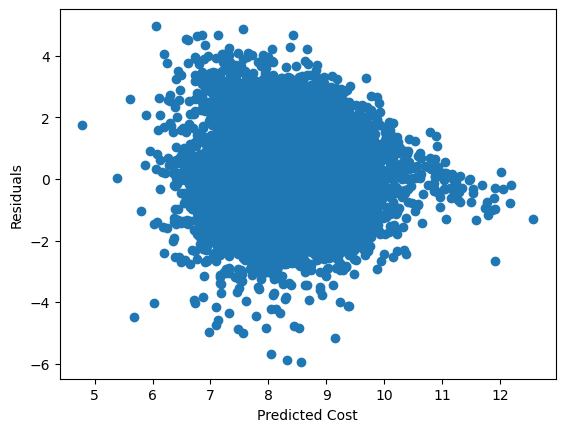

In [92]:
residuals = diabetes_train['log_cost'] - train_predictions[:, 0]

plt.scatter(train_predictions[:, 0], residuals)
plt.xlabel("Predicted Cost")
plt.ylabel("Residuals")



In [93]:
print(train_predictions[:, 0])
print(diabetes_train['log_cost'])

[9.00869984 8.01952947 7.77449516 ... 8.7311851  7.97036006 7.82816604]
15681    11.059943
8378      8.687165
14214     9.516538
5115      7.609089
6377      7.688405
           ...    
11339     7.071276
9402      6.686223
12710     8.204981
9295      7.784228
5379      9.655875
Name: log_cost, Length: 12018, dtype: float64


**Evaluation methods for general regression predicting price**
- variables you may need to use are: diabetes_train, diabetes_test, train_predictions[:, 0], test_predictions[:, 0]

In [94]:
train_rmse = np.sqrt(np.mean((train_predictions[:, 0] - diabetes_train['log_cost'])**2))
test_rmse = np.sqrt(np.mean((test_predictions[:, 0]-diabetes_test['log_cost'])**2))
# Print train RMSE
print(f"Train RMSE: {train_rmse:.2f}")
# Print test RMSE
print(f"Test RMSE: {test_rmse:.2f}")

Train RMSE: 1.27
Test RMSE: 1.25


In [95]:
train_mae= np.mean(np.abs(train_predictions[:, 0] - diabetes_train['log_cost']))
# Print train MAE
print(f'Train MAE: {train_mae:.2f}')
# Print test MAE
test_mae = np.mean(np.abs(test_predictions[:, 0] - diabetes_test['log_cost']))
print(f'Test MAE: {test_mae:.2f}')

Train MAE: 1.01
Test MAE: 0.99


In [96]:
print(region_dummies)

       Midwest  Northeast  South  Unknown  West
0            1          0      0        0     0
1            1          0      0        0     0
2            1          0      0        0     0
3            1          0      0        0     0
4            1          0      0        0     0
...        ...        ...    ...      ...   ...
20406        1          0      0        0     0
20407        1          0      0        0     0
20408        1          0      0        0     0
20409        1          0      0        0     0
20410        1          0      0        0     0

[20411 rows x 5 columns]


In [97]:
#df = diabetes_with_dummies[['Northeast', 'South', 'Midwest', 'West', 'Unknown']]
#diabetes_with_dummies.dropna(subset=['TotalCost_Y_Actual'], inplace=True)
#diabetes_with_dummies.dropna(subset=['Northeast', 'South', 'Midwest', 'West'], inplace=True)



X = diabetes_train[['South', 'Midwest', 'West']] #unknown region
X = sm.add_constant(X)
# y = diabetes_train[['TotalCost_Y_Actual']].set_index(y.index)
y = diabetes_train['TotalCost_Y_Actual']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     TotalCost_Y_Actual   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.037
Date:                Tue, 14 Nov 2023   Prob (F-statistic):             0.0279
Time:                        22:17:18   Log-Likelihood:            -1.3792e+05
No. Observations:               12018   AIC:                         2.758e+05
Df Residuals:                   12014   BIC:                         2.759e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.12e+04   8813.125      1.271      0.2

In [98]:

X = diabetes_train[[ 'Asian', 'Black', 'Hispanic',
       'Other_race',  'White']] # took out unknown_race and native american
X = sm.add_constant(X)

y = diabetes_train['TotalCost_Y_Actual']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     TotalCost_Y_Actual   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.319
Date:                Tue, 14 Nov 2023   Prob (F-statistic):             0.0409
Time:                        22:17:18   Log-Likelihood:            -1.3791e+05
No. Observations:               12018   AIC:                         2.758e+05
Df Residuals:                   12012   BIC:                         2.759e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.24e+04   1421.655      8.719      0.0